In [1]:
# Load Packages

import pandas as pd
import numpy as np
from time import time

In [2]:
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.decomposition import PCA

In [3]:
dataset = pd.read_csv("../dataset/ST12000NM0007_last_day_all_q_normalised.csv")
dataset.shape

(38256, 20)

In [4]:
drop_columns = ["date", "serial_number", "model", "capacity_bytes", "failure"]


In [5]:
dataset_copy = dataset.copy() 

In [6]:
dataset_copy.drop(drop_columns, axis = 1, inplace=True)
dataset_copy.shape

(38256, 15)

In [7]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(dataset_copy)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[ 80.98244525  94.08280876  99.95859562  84.44365635  89.33628868
   99.78925437 100.          67.5915418   99.60980583  32.4084582
   81.00629488  99.99663091  99.99663091 200.          99.98572568]
 [ 80.56148867  90.78543689  99.97152104  85.73009709  82.25760518
   99.91197411 100.          69.03559871  99.49223301  30.96440129
   35.09223301 100.         100.         200.         100.        ]
 [ 81.63807313  92.25264074  99.96401625  86.03755078  83.65455601
   99.84428323 100.          75.18786999  99.87916425  24.81213001
   81.64770749  99.99941962  99.99941962 200.         100.        ]
 [ 79.00990099  91.8019802   87.30693069  84.30693069  85.92079208
   19.32673267 100.          71.36633663  99.93069307  28.63366337
   78.28712871  99.2970297   99.2970297  200.         100.        ]
 [ 73.21979866  92.54408176  99.95530811  85.72574741  84.72528981
   99.78172666 100.          72.87034777  99.79942038  27.12965223
   73.25701647  99.99832215  99.99832215 200.         100. 

In [9]:
np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int32)

In [23]:
# import matplotlib.pyplot as plt
# from matplotlib import style
# style.use("ggplot")

In [24]:
# len(labels)

38256

In [25]:
# colors = ["g.","r.","c.","y."]
# print("function started")
# for index, row in dataset.iterrows():
# #     print("{} {}".format(row["serial_number"], labels[index]))
#     plt.plot(row["serial_number"], labels[index], colors[labels[index]], markersize = 10)
# print("function stopped")
# plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
# plt.show()    

In [26]:
# plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
# plt.show()

In [27]:
# colors = ["g.","r.","c.","y."]

# for index, row in dataset.iterrows()[:100]:
# #     print("coordinate:",dataset[i], "label:", labels[i])
#     print("{} {}".format(row["serial_number"], labels[index]))
#     plt.plot(row["serial_number"], labels[index], colors[labels[i]], markersize = 10)


# plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

# plt.show()

In [28]:
# centroids.shape

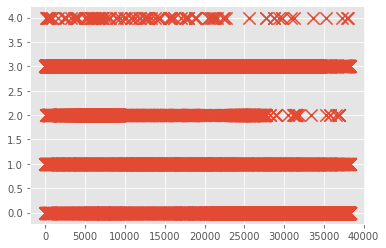

In [29]:
# plt.scatter([i for i in range(len(labels))],labels, marker = "x", s=150, linewidths = 5, zorder = 10)
# plt.show()

In [30]:
# li = []
# l2 = []
# for index, row in dataset.iterrows():
#     if labels[index] == 1:
# #         print("Serial Number : {} Cluster : {}".format(row["serial_number"], labels[index]))
#         li.append(row["serial_number"])
#     else:
#         l2.append(row["serial_number"])
# print(len(li))
# print(len(l2))

6542
31714


In [11]:
dataset.columns

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'smart_1_normalized', 'smart_3_normalized', 'smart_5_normalized',
       'smart_7_normalized', 'smart_9_normalized', 'smart_187_normalized',
       'smart_188_normalized', 'smart_190_normalized', 'smart_193_normalized',
       'smart_194_normalized', 'smart_195_normalized', 'smart_197_normalized',
       'smart_198_normalized', 'smart_199_normalized', 'smart_200_normalized'],
      dtype='object')

In [14]:
if set(['smart_5_raw', 'smart_187_raw', 'smart_188_raw', 'smart_197_raw', 'smart_198_raw']).issubset(dataset.columns):
    print(True)
else:
    print(False)

True


In [12]:
dataset = pd.read_csv("../dataset/ST12000NM0007_last_day_all_q_raw.csv")
dataset.columns

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'smart_1_raw', 'smart_4_raw', 'smart_5_raw', 'smart_7_raw',
       'smart_9_raw', 'smart_12_raw', 'smart_187_raw', 'smart_188_raw',
       'smart_190_raw', 'smart_192_raw', 'smart_193_raw', 'smart_194_raw',
       'smart_195_raw', 'smart_197_raw', 'smart_198_raw', 'smart_199_raw',
       'smart_240_raw', 'smart_241_raw', 'smart_242_raw'],
      dtype='object')

In [15]:
req_models = ['ST12000NM0007', 'ST4000DM000', 'ST8000NM0055', 'ST8000DM002', 'TOSHIBA MQ01ABF050', 'HGST HMS5C4040BLE640']


In [18]:
def has_req_cols(name):
    full_name = name + "_last_day_all_q_raw.csv"
    dataset = pd.read_csv("../dataset/" + full_name)
    if set(['smart_5_raw', 'smart_187_raw', 'smart_188_raw', 'smart_197_raw', 'smart_198_raw']).issubset(dataset.columns):
        print("{} has ALL Columns".format(name))
    else:
        print("{} has does not have ALL Columns".format(name))

In [19]:
for i in req_models:
    has_req_cols(i)

ST12000NM0007 has ALL Columns
ST4000DM000 has ALL Columns
ST8000NM0055 has ALL Columns
ST8000DM002 has ALL Columns
TOSHIBA MQ01ABF050 has does not have ALL Columns
HGST HMS5C4040BLE640 has does not have ALL Columns


In [20]:
dataset = pd.read_csv("../dataset/TOSHIBA MQ01ABF050_last_day_all_q_raw.csv")
dataset.columns

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_9_raw',
       'smart_12_raw', 'smart_191_raw', 'smart_192_raw', 'smart_193_raw',
       'smart_194_raw', 'smart_196_raw', 'smart_197_raw', 'smart_199_raw',
       'smart_222_raw', 'smart_226_raw'],
      dtype='object')

In [21]:
dataset = pd.read_csv("../dataset/HGST HMS5C4040BLE640_last_day_all_q_raw.csv")
dataset.columns

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'smart_1_raw', 'smart_2_raw', 'smart_3_raw', 'smart_4_raw',
       'smart_5_raw', 'smart_7_raw', 'smart_8_raw', 'smart_9_raw',
       'smart_10_raw', 'smart_12_raw', 'smart_192_raw', 'smart_193_raw',
       'smart_194_raw', 'smart_196_raw', 'smart_197_raw', 'smart_199_raw'],
      dtype='object')

In [23]:
st_models = req_models = ['ST12000NM0007', 'ST4000DM000', 'ST8000NM0055', 'ST8000DM002']


In [25]:
df_final = pd.DataFrame()

In [31]:
for name in st_models:
    full_name = name + "_last_day_all_q_raw.csv"
    dataset = pd.read_csv("../dataset/" + full_name)
    df = dataset[['model', 'serial_number','capacity_bytes', 'smart_5_raw', 'smart_187_raw', 'smart_188_raw', 'smart_197_raw', 'smart_198_raw']]
    df_final = df_final.append(df, ignore_index=True)
df_final.shape

(86265, 8)

In [32]:
df_final_copy = df_final.copy()
drop_columns = ['model', 'serial_number']
df_final_copy.drop(drop_columns, axis = 1, inplace=True)
df_final_copy.shape

(86265, 6)

In [38]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_final_copy)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
df_final_copy.columns

Index(['capacity_bytes', 'smart_5_raw', 'smart_187_raw', 'smart_188_raw',
       'smart_197_raw', 'smart_198_raw'],
      dtype='object')

In [40]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
df_new = pd.DataFrame()
df_new["model"] = df_final["model"]
df_new["serial_number"] = df_final["serial_number"] 
df_new["labels"] = labels

In [41]:
len(labels)

86265

In [42]:
df_new.shape

(86265, 3)

In [43]:
df_new.groupby(['model', 'labels']).count()

serial_number
model         labels               
ST12000NM0007 1               38207
              3                  49
ST4000DM000   0               23394
ST8000DM002   2                9936
ST8000NM0055  2               14679

In [54]:
def kmeans():
    st_models = req_models = ['ST12000NM0007', 'ST4000DM000', 'ST8000NM0055', 'ST8000DM002']
    df_final = pd.DataFrame()
    for name in st_models:
        full_name = name + "_last_day_all_q_raw.csv"
        dataset = pd.read_csv("../dataset/" + full_name)
        df = dataset[['model', 'serial_number','capacity_bytes', 'smart_5_raw', 'smart_187_raw', 'smart_188_raw', 'smart_197_raw', 'smart_198_raw']]
        df_final = df_final.append(df, ignore_index=True)
    df_final_copy = df_final.copy()
    drop_columns = ['model', 'serial_number']
    df_final_copy.drop(drop_columns, axis = 1, inplace=True)    
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(df_final_copy)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    df_new = pd.DataFrame()
    df_new["model"] = df_final["model"]
    df_new["serial_number"] = df_final["serial_number"] 
    df_new["labels"] = labels
    dx = df_new.groupby(['model', 'labels']).count()
    return dx
result = kmeans()    
result

serial_number
model         labels               
ST12000NM0007 1               38207
              3                  49
ST4000DM000   2               23394
ST8000DM002   0                9936
ST8000NM0055  0               14679

In [55]:
result.unstack()

serial_number                        
labels                    0        1        2     3
model                                              
ST12000NM0007           NaN  38207.0      NaN  49.0
ST4000DM000             NaN      NaN  23394.0   NaN
ST8000DM002          9936.0      NaN      NaN   NaN
ST8000NM0055        14679.0      NaN      NaN   NaN

In [3]:
def dbscan():
    st_models = req_models = ['ST12000NM0007', 'ST4000DM000', 'ST8000NM0055', 'ST8000DM002']
    df_final = pd.DataFrame()
    print("dataset read")
    for name in st_models:
        full_name = name + "_last_day_all_q_raw.csv"
        dataset = pd.read_csv("../dataset/" + full_name)
        df = dataset[['model', 'serial_number','capacity_bytes', 'smart_5_raw', 'smart_187_raw', 'smart_188_raw', 'smart_197_raw', 'smart_198_raw']]
        df_final = df_final.append(df, ignore_index=True)
    print("dataset read complete")    
    df_final_copy = df_final.copy()
    drop_columns = ['model', 'serial_number']
    df_final_copy.drop(drop_columns, axis = 1, inplace=True)    
    print("dataset column drop complete")
    print("algo started")
    db = DBSCAN( min_samples=1000)
    db.fit(df_final_copy)
    print("algo finished")
    labels = db.labels_
    df_new = pd.DataFrame()
    df_new["model"] = df_final["model"]
    df_new["serial_number"] = df_final["serial_number"] 
    df_new["labels"] = labels
    dx = df_new.groupby(['model', 'labels']).count()
    print("time return result")
    return dx
result = dbscan()    
result

dataset read
dataset read complete
dataset column drop complete
algo started
algo finished
time return result


serial_number
model         labels               
ST12000NM0007 -1               2952
               0              35304
ST4000DM000   -1               1921
               1              21473
ST8000DM002   -1                769
               2               9167
ST8000NM0055  -1               1220
               2              13459

In [57]:
result.unstack()

serial_number                           
labels                   -1        0        1        2
model                                                 
ST12000NM0007        2952.0  35304.0      NaN      NaN
ST4000DM000          1921.0      NaN  21473.0      NaN
ST8000DM002           769.0      NaN      NaN   9167.0
ST8000NM0055         1220.0      NaN      NaN  13459.0

In [ ]:
def spectral():
    st_models = req_models = ['ST12000NM0007', 'ST4000DM000', 'ST8000NM0055', 'ST8000DM002']
    df_final = pd.DataFrame()
    print("dataset read")
    for name in st_models:
        full_name = name + "_last_day_all_q_raw.csv"
        dataset = pd.read_csv("../dataset/" + full_name)
        df = dataset[['model', 'serial_number','capacity_bytes', 'smart_5_raw', 'smart_187_raw', 'smart_188_raw', 'smart_197_raw', 'smart_198_raw']]
        df_final = df_final.append(df, ignore_index=True)
    print("dataset read complete")    
    df_final_copy = df_final.copy()
    drop_columns = ['model', 'serial_number']
    df_final_copy.drop(drop_columns, axis = 1, inplace=True)    
    print("dataset column drop complete")
    print("algo started")
    sc = SpectralClustering(n_clusters=4)
    sc.fit(df_final_copy)
    print("algo finished")
    labels = sc.labels_
    df_new = pd.DataFrame()
    df_new["model"] = df_final["model"]
    df_new["serial_number"] = df_final["serial_number"] 
    df_new["labels"] = labels
    dx = df_new.groupby(['model', 'labels']).count()
    print("time return result")
    return dx
result = spectral()    
result

dataset read
dataset read complete
dataset column drop complete
algo started


In [ ]:
result.unstack()

In [8]:
st_models = req_models = ['ST12000NM0007', 'ST4000DM000', 'ST8000NM0055', 'ST8000DM002']
df_final = pd.DataFrame()
for name in st_models:
    full_name = name + "_last_day_all_q_raw.csv"
    dataset = pd.read_csv("../dataset/" + full_name)
    df = dataset[['model', 'serial_number','capacity_bytes', 'smart_5_raw', 'smart_187_raw', 'smart_188_raw', 'smart_197_raw', 'smart_198_raw']]
    df_final = df_final.append(df, ignore_index=True)
df_final.to_csv("four_model_data.csv")    

In [1]:
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

Automatically created module for IPython interactive environment


<Figure size 2100x1250 with 60 Axes>

In [2]:
plt.savefig('img.png')

<Figure size 432x288 with 0 Axes>

# with grid search

In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import silhouette_score as sc
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
import datetime

def cv_silhouette_scorer(estimator, X):
    estimator.fit(X)
    cluster_labels = estimator.labels_
    num_labels = len(set(cluster_labels))
    num_samples = len(X.index)
    if num_labels == 1 or num_labels == num_samples:
        return -1
    else:
        return sc(X, cluster_labels)

def dbscan():
    st_models = req_models = ['ST12000NM0007', 'ST4000DM000', 'ST8000NM0055', 'ST8000DM002']
    df_final = pd.DataFrame()
    print("dataset read")
    for name in st_models:
        full_name = name + "_last_day_all_q_raw.csv"
        dataset = pd.read_csv("../dataset/" + full_name)
        df = dataset[['model', 'serial_number','capacity_bytes', 'smart_5_raw', 'smart_187_raw', 'smart_188_raw', 'smart_197_raw', 'smart_198_raw']]
        df_final = df_final.append(df, ignore_index=True)
    print("dataset read complete")    
    df_final_copy = df_final.copy()
    drop_columns = ['model', 'serial_number']
    df_final_copy.drop(drop_columns, axis = 1, inplace=True)    
    print("dataset column drop complete")
    print("algo started")
    
    #####
    param_dict = {}
    param_dict["min_samples"] =  [500, 1000, 1500, 2000]
    param_dict["leaf_size"] = np.linspace(20, 100, 5)
    gs = GridSearchCV(estimator=DBSCAN(), param_grid=param_dict, 
                  scoring=cv_silhouette_scorer, n_jobs=4)
    gs.fit(df_final_copy)
    print(gs.best_estimator_)
    #####
    db = gs.best_estimator_ #DBSCAN( min_samples=1000)
    db.fit(df_final_copy)
    print("algo finished")
    labels = db.labels_
    df_new = pd.DataFrame()
    df_new["model"] = df_final["model"]
    df_new["serial_number"] = df_final["serial_number"] 
    df_new["labels"] = labels
    dx = df_new.groupby(['model', 'labels']).count()
    print("time return result")
    return dx
result = dbscan()    
result

dataset read
dataset read complete
dataset column drop complete
algo started


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DBSCAN(algorithm='auto', eps=0.5, leaf_size=20.0, metric='euclidean',
       metric_params=None, min_samples=1000, n_jobs=None, p=None)
algo finished
time return result


serial_number
model         labels               
ST12000NM0007 -1               2952
               0              35304
ST4000DM000   -1               1921
               1              21473
ST8000DM002   -1                769
               2               9167
ST8000NM0055  -1               1220
               2              13459

NameError: name 'df_new' is not defined